### A model to predict the survival rate among patients based on history survival data

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import the data
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [3]:
#Get the description of data
pharma_data.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [4]:
#Get info of the data
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [5]:
#Some of the data is missing, and we will drop that
pharma_data.dropna(inplace = True)

In [6]:
#Get the number of unique values
for i in pharma_data.columns:
    print(i, pharma_data[i].nunique())

ID_Patient_Care_Situation 21849
Diagnosed_Condition 52
Patient_ID 9960
Treated_with_drugs 32
Patient_Age 67
Patient_Body_Mass_Index 9960
Patient_Smoker 2
Patient_Rural_Urban 2
Patient_mental_condition 1
A 2
B 2
C 2
D 2
E 2
F 2
Z 1
Number_of_prev_cond 5
Survived_1_year 2


In [7]:
#Drop the unnecessary columns
pharma_data.drop(['ID_Patient_Care_Situation', 'Patient_ID', 'Patient_mental_condition', 'Z'], axis = 1, inplace = True)

In [8]:
#Get the numeric features
num_columns = list(pharma_data._get_numeric_data().columns)
num_data = pharma_data[num_columns]
num_columns

['Diagnosed_Condition',
 'Patient_Age',
 'Patient_Body_Mass_Index',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'Number_of_prev_cond',
 'Survived_1_year']

In [9]:
#Get categorical features
cat_columns = list(set(pharma_data.columns) - set(num_columns))
cat_columns

['Patient_Rural_Urban', 'Treated_with_drugs', 'Patient_Smoker']

In [51]:
#LabelEncode the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_columns:
    pharma_data[col] = le.fit_transform(pharma_data[col])
pharma_data

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Number_of_prev_cond,Survived_1_year
0,8,31,56,18.479385,1,1,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,5,16,36,22.945566,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,23,31,48,27.510027,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,51,0,5,19.130976,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,45,31,47,26.155120,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,3,21,14,18.643448,0,0,1.0,1.0,0.0,1.0,1.0,1.0,5.0,0
23093,41,31,55,23.684585,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,24,31,63,27.500039,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,11,24,25,23.719125,1,0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,1


### Feature selection

In [62]:
features = pharma_data.iloc[:, :-1]
labels = pharma_data.iloc[:, -1]

In [63]:
unique, counts = np.unique(labels, return_counts = True)
print(np.asarray((unique, counts)).T)
print(len(labels))

[[    0  8207]
 [    1 13642]]
21849


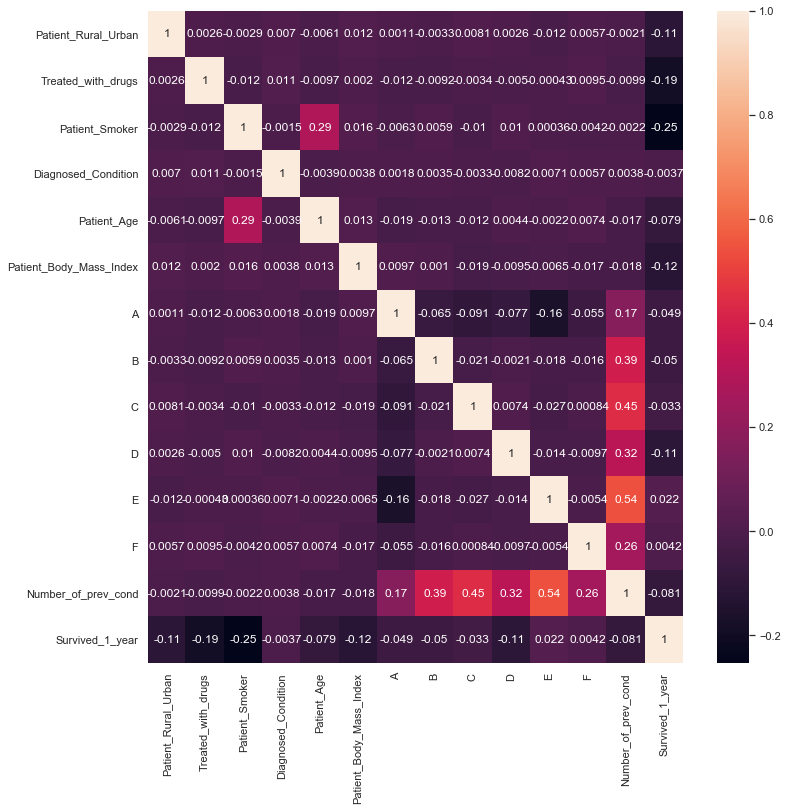

In [64]:
#Get the correlation matrix visualization
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(data.corr(), annot = True)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size = 0.75, random_state = 42)

In [66]:
X_train.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Number_of_prev_cond
20311,27,30,33,22.932488,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4210,38,31,63,26.988506,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
22532,5,31,9,24.936453,0,0,1.0,0.0,1.0,0.0,1.0,1.0,4.0
21114,1,31,5,25.965744,0,0,1.0,1.0,1.0,0.0,0.0,0.0,3.0
19138,30,31,24,23.025267,1,0,1.0,0.0,0.0,0.0,1.0,0.0,2.0


In [67]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
clf = LogisticRegression()
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_pred, y_test)

C:\Users\thakk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.778050108932462

In [83]:
#Tune RF
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   40.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [84]:
best_random = rf_random.best_estimator_
best_random

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1800, max_depth = 90, min_samples_leaf = 4, min_samples_split = 2, random_state = 42)
model_rf = rf.fit(features, labels)
y_pred_rf = model_rf.predict(features)
f1_score(y_pred_rf, labels)

0.9263859217148858

In [88]:
#Get the test data
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [89]:
test_data.drop(['ID_Patient_Care_Situation', 'Patient_ID', 'Patient_mental_condition', 'Z'], axis = 1, inplace = True)
test_data.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Number_of_prev_cond
0,40,DX3,16,29.443894,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1,52,DX6,24,26.836321,NO,URBAN,1.0,1.0,0.0,0.0,0.0,0.0,2.0
2,50,DX4 DX5,63,25.523280,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,2.0
3,32,DX6,42,27.171155,NO,URBAN,1.0,0.0,1.0,0.0,1.0,0.0,3.0
4,20,DX3,50,25.556192,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
#LabelEncode Categorical columns
for col in cat_columns:
    test_data[col] = le.fit_transform(test_data[col])
test_data

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,A,B,C,D,E,F,Number_of_prev_cond
0,40,24,16,29.443894,0,0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1,52,31,24,26.836321,0,1,1.0,1.0,0.0,0.0,0.0,0.0,2.0
2,50,29,63,25.523280,0,0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
3,32,31,42,27.171155,0,1,1.0,0.0,1.0,0.0,1.0,0.0,3.0
4,20,24,50,25.556192,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9298,11,31,28,29.106314,0,0,1.0,1.0,1.0,0.0,0.0,0.0,3.0
9299,7,0,4,20.616673,0,1,1.0,1.0,0.0,0.0,0.0,0.0,2.0
9300,16,11,20,24.727357,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9301,50,28,33,17.517426,0,1,1.0,1.0,1.0,1.0,0.0,1.0,5.0


In [91]:
y_pred = model_rf.predict(test_data)
unique, counts = np.unique(y_pred, return_counts = True)
print(np.asarray((unique,counts)).T)

[[   0 3255]
 [   1 6048]]


In [92]:
results = pd.DataFrame(y_pred, columns = ['prediction'])
results.to_csv('results.csv', index = False)